# Introduction

<p>The dataset contains the U.S. border crossing, which contains information of the inbound crossings at the U.S.-Canada ana U.S.- Mexico borders.

COLUMNS DESCRIPTION  <br/>
> Port Name: Name of the Port of Entry <br/>
> State: State <br/>
> Port Code: CBP port code <br/>
> Border: US-Canada Border [](http://)or US-Mexico Border <br/>
> Date: Year, Month <br/>
> Measure: Conveyances,Means <br/>
> Value: Count <br/>
> Location: Longitude and Latitude Location

___

importing of relevant libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(palette=("Set1"))

In [2]:
df = pd.read_csv('Border_Crossing_Entry_Data.csv')
df

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01)
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78)
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49)
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67)


# Exploration and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  346733 non-null  object
 1   State      346733 non-null  object
 2   Port Code  346733 non-null  int64 
 3   Border     346733 non-null  object
 4   Date       346733 non-null  object
 5   Measure    346733 non-null  object
 6   Value      346733 non-null  int64 
 7   Location   346733 non-null  object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [4]:
df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Location     0
dtype: int64

There is no missing value in the data 

Using Pandas Describe object for futher Analysis

In [5]:
df.describe(include='all')

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
count,346733,346733,346733.000000,346733,346733,346733,3.467330e+05,346733
unique,116,15,NaN,2,279,12,NaN,224
top,Eastport,North Dakota,NaN,US-Canada Border,07/01/2010 12:00:00 AM,Personal Vehicles,NaN,POINT (-83.04 42.32)
freq,5541,57071,NaN,266187,1356,30219,NaN,3069
mean,NaN,NaN,2455.504910,NaN,NaN,NaN,2.818767e+04,NaN
std,NaN,NaN,1201.208459,NaN,NaN,NaN,1.518588e+05,NaN
min,NaN,NaN,101.000000,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,2304.000000,NaN,NaN,NaN,0.000000e+00,NaN
50%,NaN,NaN,3013.000000,NaN,NaN,NaN,9.000000e+01,NaN
75%,NaN,NaN,3402.000000,NaN,NaN,NaN,2.483000e+03,NaN


Checking for duplicated rows

In [6]:
df.duplicated().sum()

0

Since the Port code column is an idientification value for Port Name I have to check if it has the same unique values as the Port Name column 

In [7]:
print('Unique values in Port Name: '+str(df['Port Name'].nunique() ))
print("Unique values in Port Code: " +str(df['Port Code'].nunique()))

Unique values in Port Name: 116
Unique values in Port Code: 117


They are not the same!!
<p> 

Since they are not the same, I have to fix the problem

In [8]:
port=df[['Port Name','Port Code']].drop_duplicates()
port[port['Port Name'].duplicated(keep = False)]

,Port Name,Port Code
29,Eastport,3302
217,Eastport,103


In [9]:
df.loc[(df['Port Code']==103) | (df['Port Code']==3302)]


,Port Name,State,Port Code,Border,Date,Measure,Value,Location
29,Eastport,Idaho,3302,US-Canada Border,03/01/2019 12:00:00 AM,Trains,101,POINT (-116.18027999999998 48.99944)
41,Eastport,Idaho,3302,US-Canada Border,03/01/2019 12:00:00 AM,Pedestrians,200,POINT (-116.18027999999998 48.99944)
129,Eastport,Idaho,3302,US-Canada Border,03/01/2019 12:00:00 AM,Train Passengers,200,POINT (-116.18027999999998 48.99944)
217,Eastport,Maine,103,US-Canada Border,03/01/2019 12:00:00 AM,Trucks,165,POINT (-66.99387 44.90357)
249,Eastport,Maine,103,US-Canada Border,03/01/2019 12:00:00 AM,Pedestrians,3,POINT (-66.99387 44.90357)
...,...,...,...,...,...,...,...,...
346152,Eastport,Idaho,3302,US-Canada Border,01/01/1996 12:00:00 AM,Truck Containers Empty,26,POINT (-116.17999999999999 49)
346158,Eastport,Idaho,3302,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Empty,101,POINT (-116.17999999999999 49)
346282,Eastport,Idaho,3302,US-Canada Border,01/01/1996 12:00:00 AM,Pedestrians,160,POINT (-116.17999999999999 49)
346445,Eastport,Idaho,3302,US-Canada Border,01/01/1996 12:00:00 AM,Truck Containers Full,3250,POINT (-116.17999999999999 49)


From the code above I can see that Eastport have to different port code and the two Eastport are located at different states
<p>I now have to rename it to avoid further confusion 


Rename Eastport located in Maine to 'Eastport Maine' to avoid confusion and bais

In [10]:
df.loc[(df['Port Name'] == 'Eastport') & (df['State'] == 'Maine'), 'Port Name'] = 'Eastport Maine'

Converting Date column to pandas datetime

In [11]:

Date = pd.to_datetime(df['Date'])
Date

0        2019-03-01
1        2019-03-01
2        2019-03-01
3        2019-03-01
4        2019-03-01
            ...    
346728   1996-01-01
346729   1996-01-01
346730   1996-01-01
346731   1996-01-01
346732   1996-01-01
Name: Date, Length: 346733, dtype: datetime64[ns]

In [12]:
df2 = pd.DataFrame(df)
df2

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01)
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78)
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49)
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67)


Creating Year and Month Column from Date Column

In [13]:
df2['Year'] =Date.dt.year
df2['Month'] =Date.dt.month
df2

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3
...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996,1
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1


Creating Longitude and Latitude from Location Column

In [14]:
def longitude(x):
    b1= x.split('(')[1]
    b2 = b1.split(')')
    for i in b2:
         return i.split()[0]

def latitude(x):
    b1= x.split('(')[1]
    b2 = b1.split(')')
    for i in b2:
         return i.split()[1]

df2['latitude'] = df2.Location.apply(latitude)
df2['longitude'] = df2.Location.apply(longitude)


In [15]:
df2

,Port Name,State,Port Code,Border,Date,Measure,Value,Location,Year,Month,latitude,longitude
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524),2019,3,32.67524,-115.48433000000001
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207),2019,3,47.16207,-67.94271
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333),2019,3,32.57333,-117.05333
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996),2019,3,31.340279999999996,-110.93361
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),2019,3,44.990010000000005,-73.44253
...,...,...,...,...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01),1996,1,45.01,-71.79
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78),1996,1,31.78,-107.63
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49),1996,1,49,-99.35
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67),1996,1,32.67,-115.39


Which border has the most Occurrence? 

In [16]:
Border_count = df2.Border.value_counts()
Border_count

US-Canada Border    266187
US-Mexico Border     80546
Name: Border, dtype: int64

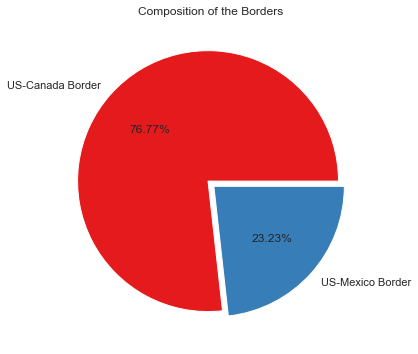

In [17]:
plt.figure(figsize=(7,6))
plt.pie(x = Border_count.values,explode=[0.03,0.03], labels = Border_count.index, autopct='%0.2f%%',)
plt.title('Composition of the Borders')
plt.show()



From the chart we can see that US-Canada Border 76.77% has more occurrence than US-Mexico Border 23.23%

Which states have the highest Occurrence in each border ?


Using the pandas group function. I have the table below:

In [18]:
df2.groupby(['Border','State']).count()

Port Name  Port Code   Date  Measure  Value  \
Border           State                                                       
US-Canada Border Alaska            11529      11529  11529    11529  11529   
                 Idaho              6551       6551   6551     6551   6551   
                 Maine             38136      38136  38136    38136  38136   
                 Michigan           9985       9985   9985     9985   9985   
                 Minnesota         23135      23135  23135    23135  23135   
                 Montana           38154      38154  38154    38154  38154   
                 New York          20697      20697  20697    20697  20697   
                 North Dakota      57071      57071  57071    57071  57071   
                 Ohio                  5          5      5        5      5   
                 Vermont           16247      16247  16247    16247  16247   
                 Washington        44677      44677  44677    44677  44677   
US-Mexico Border Arizona           19252      19252  19252    19252  19252   
                 California        19102      19102  19102    19102  19102   
                 New Mexico         6438       6438   6438     6438   6438   
                 Texas             35754      35754  35754    35754  35754   

                               Location   Year  Month  latitude  longitude  
Border           State                                                      
US-Canada Border Alaska           11529  11529  11529     11529      11529  
                 Idaho             6551   6551   6551      6551       6551  
                 Maine            38136  38136  38136     38136      38136  
                 Michigan          9985   9985   9985      9985       9985  
                 Minnesota        23135  23135  23135     23135      23135  
                 Montana          38154  38154  38154     38154      38154  
                 New York         20697  20697  20697     20697      20697  
                 North Dakota     57071  57071  57071     57071      57071  
                 Ohio                 5      5      5         5          5  
                 Vermont          16247  16247  16247     16247      16247  
                 Washington       44677  44677  44677     44677      44677  
US-Mexico Border Arizona          19252  19252  19252     19252      19252  
                 California       19102  19102  19102     19102      19102  
                 New Mexico        6438   6438   6438      6438       6438  
                 Texas            35754  35754  35754     35754      35754

From the table above, it can been seen that North Dakota has the highest occurrence in US-Canada Border while Texas has the highest occurrence in US-Mexico Border
<p> Visualizing it, we have the bar chart below.

C:\Users\vans\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


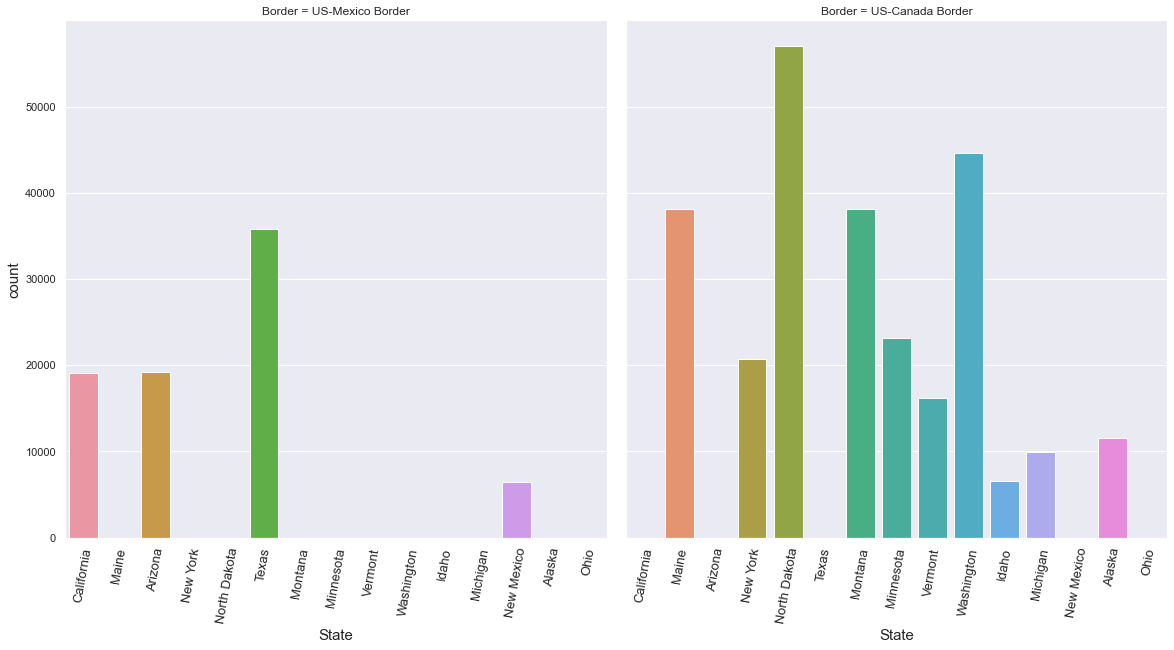

In [19]:

g1 = sns.catplot('State',col="Border",data=df2, kind='count', height=8, aspect=1,col_wrap=3,)
g1.set_ylabels(fontsize=15)
g1.set_xlabels(fontsize=15)
g1.set_xticklabels(rotation=80,fontsize=13)
plt.show()

which Ports have the highest occurrence?

In the output of pandas describe object, it was show that port has 117 unique values, which is 117 ports. 
<p>Visualizing ports using word cloud and matplotlib we have the following below


In [20]:
df2['Port Name'].value_counts()

El Paso                   3348
Sweetgrass                3348
Buffalo-Niagara Falls     3348
Calexico East             3348
Champlain-Rouses Point    3348
                          ... 
Bar Harbor                1068
Boquillas                  250
Algonac                     20
Cross Border Xpress         18
Toledo-Sandusky              5
Name: Port Name, Length: 117, dtype: int64

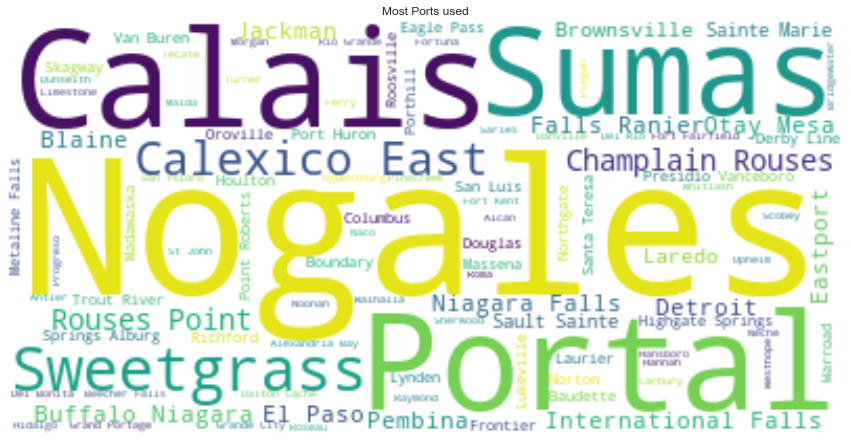

In [21]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df2['Port Name'])
wordcloud = WordCloud(max_words=100, background_color="White").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Ports used')
plt.show()

From the image above the Ports which its name appear in big fonts have the highest occurrences

Which Measures have the hieght occurrences ?

In [22]:
Measure_count =df2.Measure.value_counts()

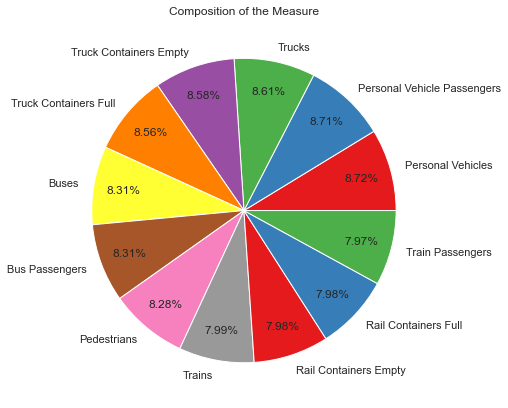

In [23]:
plt.figure(figsize=(8,7))
plt.pie(x = Measure_count.values,labels = Measure_count.index,autopct='%0.2f%%',pctdistance=0.8)
plt.title('Composition of the Measure')

plt.show()


From the above chart it can be shown that Trucks has the highest occurrences but its difference of from other measures is not much.

In [24]:
Measure_group = df2.groupby(['Border','Measure']).count()
Measure_group

Port Name  State  Port Code  \
Border           Measure                                                    
US-Canada Border Bus Passengers                   22090  22090      22090   
                 Buses                            22092  22092      22092   
                 Pedestrians                      21663  21663      21663   
                 Personal Vehicle Passengers      23202  23202      23202   
                 Personal Vehicles                23225  23225      23225   
                 Rail Containers Empty            21266  21266      21266   
                 Rail Containers Full             21266  21266      21266   
                 Train Passengers                 21296  21296      21296   
                 Trains                           21290  21290      21290   
                 Truck Containers Empty           22929  22929      22929   
                 Truck Containers Full            22855  22855      22855   
                 Trucks                           23013  23013      23013   
US-Mexico Border Bus Passengers                    6730   6730       6730   
                 Buses                             6730   6730       6730   
                 Pedestrians                       7034   7034       7034   
                 Personal Vehicle Passengers       6994   6994       6994   
                 Personal Vehicles                 6994   6994       6994   
                 Rail Containers Empty             6418   6418       6418   
                 Rail Containers Full              6391   6391       6391   
                 Train Passengers                  6327   6327       6327   
                 Trains                            6418   6418       6418   
                 Truck Containers Empty            6828   6828       6828   
                 Truck Containers Full             6839   6839       6839   
                 Trucks                            6843   6843       6843   

                                               Date  Value  Location   Year  \
Border           Measure                                                      
US-Canada Border Bus Passengers               22090  22090     22090  22090   
                 Buses                        22092  22092     22092  22092   
                 Pedestrians                  21663  21663     21663  21663   
                 Personal Vehicle Passengers  23202  23202     23202  23202   
                 Personal Vehicles            23225  23225     23225  23225   
                 Rail Containers Empty        21266  21266     21266  21266   
                 Rail Containers Full         21266  21266     21266  21266   
                 Train Passengers             21296  21296     21296  21296   
                 Trains                       21290  21290     21290  21290   
                 Truck Containers Empty       22929  22929     22929  22929   
                 Truck Containers Full        22855  22855     22855  22855   
                 Trucks                       23013  23013     23013  23013   
US-Mexico Border Bus Passengers                6730   6730      6730   6730   
                 Buses                         6730   6730      6730   6730   
                 Pedestrians                   7034   7034      7034   7034   
                 Personal Vehicle Passengers   6994   6994      6994   6994   
                 Personal Vehicles             6994   6994      6994   6994   
                 Rail Containers Empty         6418   6418      6418   6418   
                 Rail Containers Full          6391   6391      6391   6391   
                 Train Passengers              6327   6327      6327   6327   
                 Trains                        6418   6418      6418   6418   
                 Truck Containers Empty        6828   6828      6828   6828   
                 Truck Containers Full         6839   6839      6839   6839   
                 Trucks                        6843   6843      6843

Visualizing with respect to the Border we have the chart below

C:\Users\vans\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


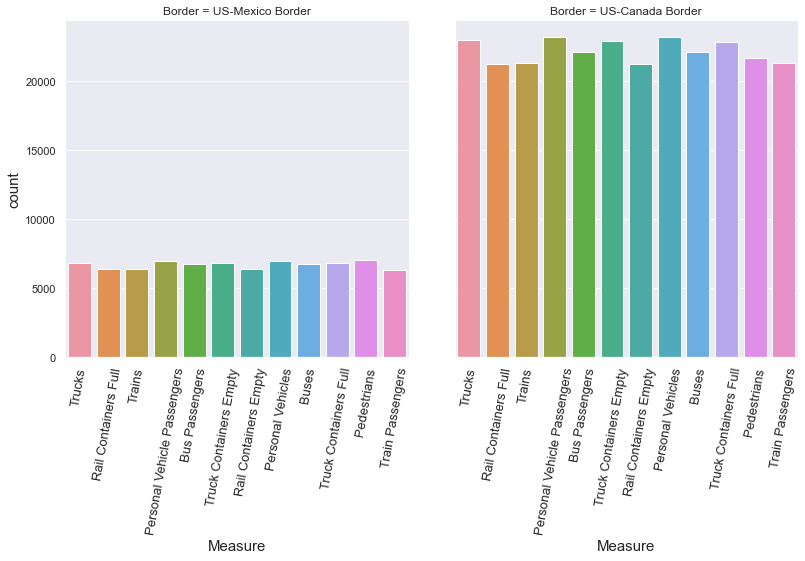

In [25]:
g2 = sns.catplot('Measure',col="Border",data=df2,kind='count', height=5.5, aspect=1,col_wrap=3)
g2.set_ylabels(fontsize=15)
g2.set_xlabels(fontsize=15)
g2.set_xticklabels(rotation=80,fontsize=13)
plt.show()

Which Year hass the most occurrences?

In [26]:
year_count=df2.Year.value_counts()
year_count

2010    16200
2005    16128
2006    16128
2009    16056
2008    16056
2007    16056
2015    15984
2004    15984
2013    15840
2012    15840
2011    15840
2014    15840
2003    15588
2001    14832
1999    14832
1998    14832
1997    14832
2000    14832
1996    14832
2002    14832
2016    13754
2017     9717
2018     9534
2019     2364
Name: Year, dtype: int64

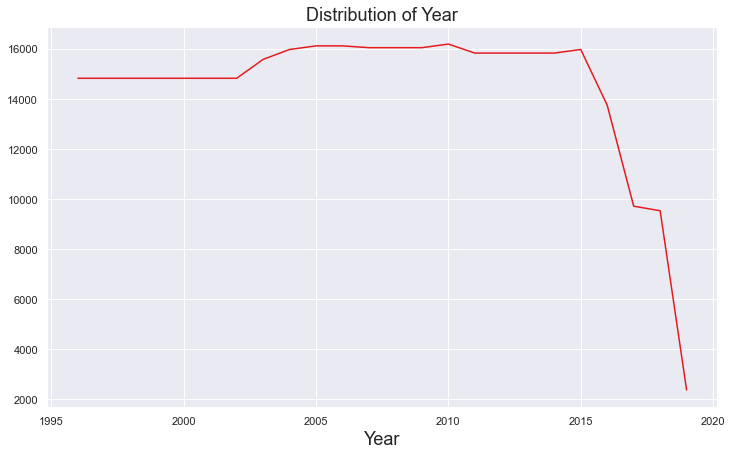

In [27]:
plt.figure(figsize = (12,7))
sns.lineplot(x= year_count.index,y=year_count.values)
plt.title('Distribution of Year',fontsize=18,)
plt.xlabel('Year',fontsize=18)
plt.show()

In the graph above 2010 and 2005 have the highest occurrences  and 2019 and 2018 have the lowest occurrences  in the data 

Visualizing Year with respect to measure

In [28]:
measure_year =df2.groupby(['Border','Year','Measure']).count().sort_values(by=['Border','Year','Measure']).reset_index()
measure_year

,Border,Year,Measure,Port Name,State,Port Code,Date,Value,Location,Month,latitude,longitude
0,US-Canada Border,1996,Bus Passengers,936,936,936,936,936,936,936,936,936
1,US-Canada Border,1996,Buses,936,936,936,936,936,936,936,936,936
2,US-Canada Border,1996,Pedestrians,936,936,936,936,936,936,936,936,936
3,US-Canada Border,1996,Personal Vehicle Passengers,936,936,936,936,936,936,936,936,936
4,US-Canada Border,1996,Personal Vehicles,936,936,936,936,936,936,936,936,936
...,...,...,...,...,...,...,...,...,...,...,...,...
571,US-Mexico Border,2019,Train Passengers,12,12,12,12,12,12,12,12,12
572,US-Mexico Border,2019,Trains,21,21,21,21,21,21,21,21,21
573,US-Mexico Border,2019,Truck Containers Empty,58,58,58,58,58,58,58,58,58
574,US-Mexico Border,2019,Truck Containers Full,60,60,60,60,60,60,60,60,60


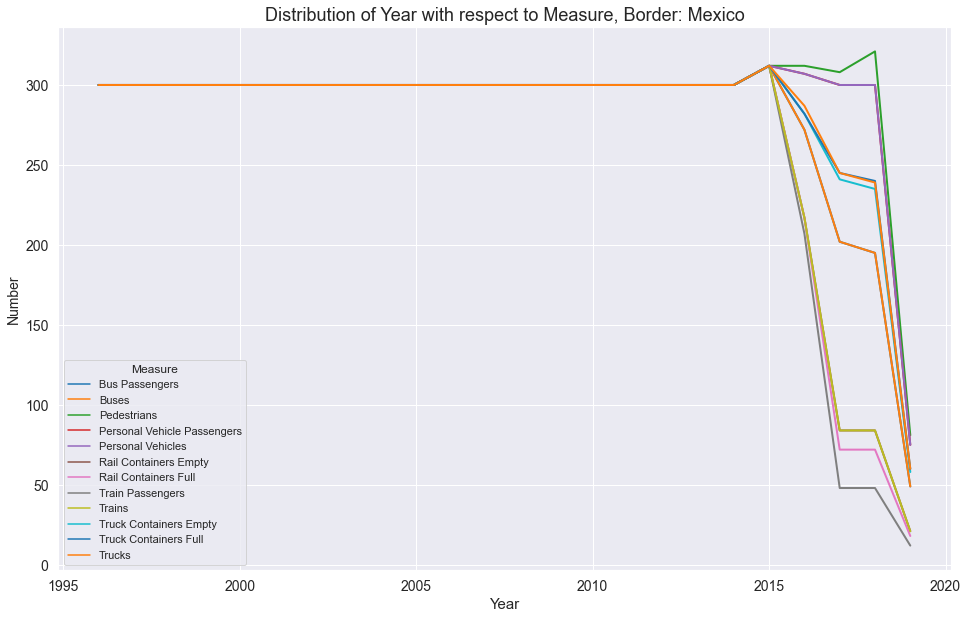

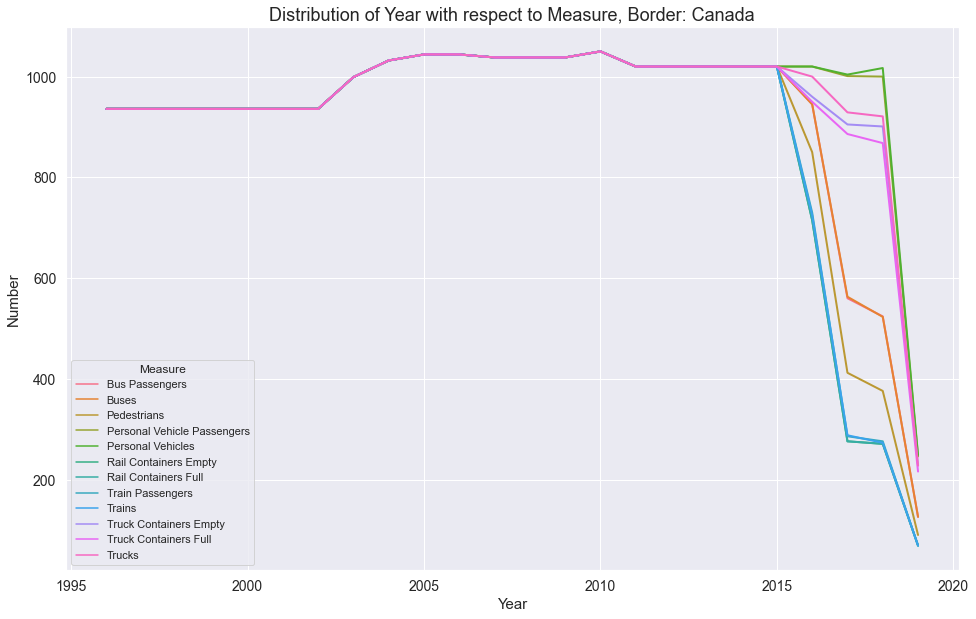

In [29]:
plt.figure(figsize=(16,10))
sns.lineplot(x='Year', y ='State',hue='Measure', data=measure_year[measure_year['Border']=='US-Mexico Border'],lw=2,
             palette ='tab10')
plt.title('Distribution of Year with respect to Measure, Border: Mexico',fontsize=18,)
plt.ylabel('Number',fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Year',fontsize=15)
plt.yticks(fontsize=14)
plt.show()

plt.figure(figsize=(16,10))
sns.lineplot(x='Year', y ='State',hue='Measure', data=measure_year[measure_year['Border']=='US-Canada Border'],lw=2)
plt.title('Distribution of Year with respect to Measure, Border: Canada',fontsize=18,)
plt.ylabel('Number',fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Year',fontsize=15)
plt.yticks(fontsize=14)

plt.show()

In [30]:
year_border =df2.groupby(['Border','Year']).count().sort_values(by=['Border','Year',]).reset_index()
year_border

,Border,Year,Port Name,State,Port Code,Date,Measure,Value,Location,Month,latitude,longitude
0,US-Canada Border,1996,11232,11232,11232,11232,11232,11232,11232,11232,11232,11232
1,US-Canada Border,1997,11232,11232,11232,11232,11232,11232,11232,11232,11232,11232
2,US-Canada Border,1998,11232,11232,11232,11232,11232,11232,11232,11232,11232,11232
3,US-Canada Border,1999,11232,11232,11232,11232,11232,11232,11232,11232,11232,11232
4,US-Canada Border,2000,11232,11232,11232,11232,11232,11232,11232,11232,11232,11232
5,US-Canada Border,2001,11232,11232,11232,11232,11232,11232,11232,11232,11232,11232
6,US-Canada Border,2002,11232,11232,11232,11232,11232,11232,11232,11232,11232,11232
7,US-Canada Border,2003,11988,11988,11988,11988,11988,11988,11988,11988,11988,11988
8,US-Canada Border,2004,12384,12384,12384,12384,12384,12384,12384,12384,12384,12384
9,US-Canada Border,2005,12528,12528,12528,12528,12528,12528,12528,12528,12528,12528


In [31]:
df2[df2.Border=='US-Canada Border'].Year.value_counts()


2010    12600
2005    12528
2006    12528
2009    12456
2008    12456
2007    12456
2004    12384
2013    12240
2012    12240
2011    12240
2014    12240
2015    12240
2003    11988
2001    11232
1999    11232
1998    11232
1997    11232
2000    11232
1996    11232
2002    11232
2016    10575
2017     7386
2018     7221
2019     1785
Name: Year, dtype: int64

How has the occurrence of each border changed through out the years?  

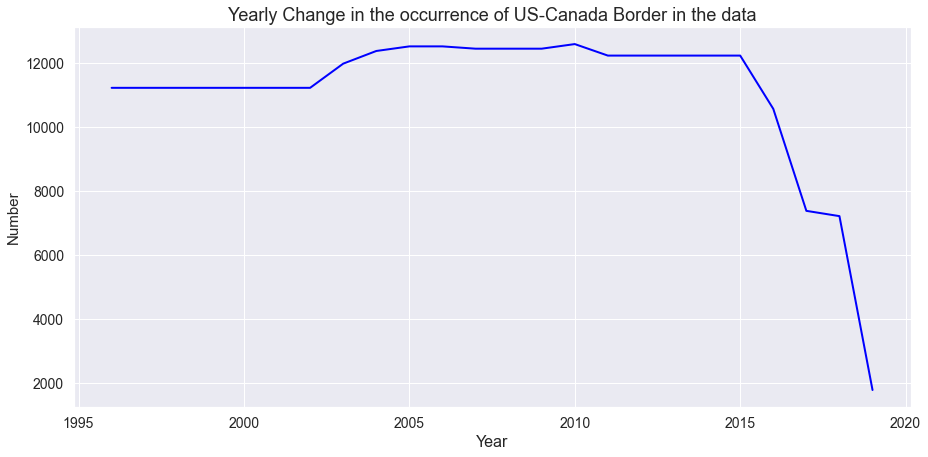

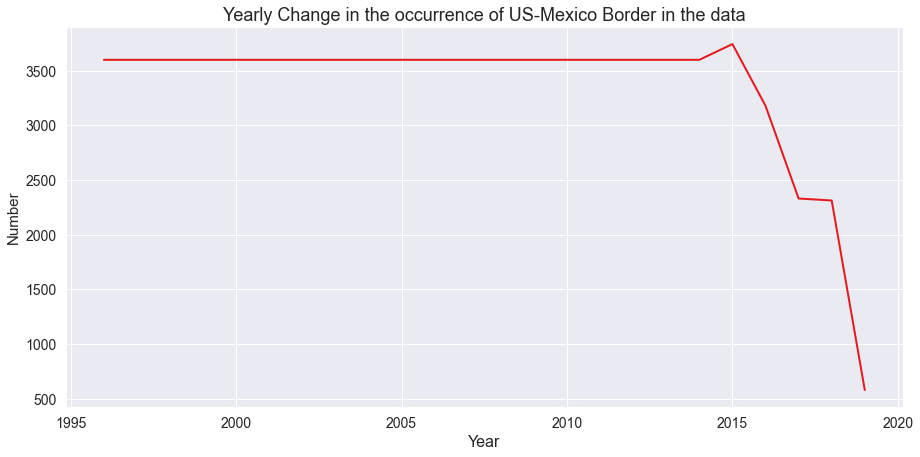

In [32]:
plt.figure(figsize=(15,7))

sns.lineplot(data =year_border[year_border.Border== 'US-Canada Border'], x='Year',y ='State', color= 'b',lw=2)
plt.title('Yearly Change in the occurrence of US-Canada Border in the data', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number',fontsize=15)
plt.xlabel('Year', fontsize=16)
plt.show()


plt.figure(figsize=(15,7))

sns.lineplot(data =year_border[year_border.Border== 'US-Mexico Border'], x='Year',y ='State', lw=2)
plt.title('Yearly Change in the occurrence of US-Mexico Border in the data', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Year', fontsize=16)

plt.show()



From the graph above, it is shown that occurrences US-Canada Border is on 2010 while in US-Mexico Border is on 2015. 
<p> They both have it lowest occurrences in 2018-2019


How has the data changed through out the Months?  

In [33]:
month_border =df2.groupby(['Border','Month']).count().sort_values(by=['Border','Month']).reset_index()
month_border

,Border,Month,Port Name,State,Port Code,Date,Measure,Value,Location,Year,latitude,longitude
0,US-Canada Border,1,22721,22721,22721,22721,22721,22721,22721,22721,22721,22721
1,US-Canada Border,2,22726,22726,22726,22726,22726,22726,22726,22726,22726,22726
2,US-Canada Border,3,22726,22726,22726,22726,22726,22726,22726,22726,22726,22726
3,US-Canada Border,4,22126,22126,22126,22126,22126,22126,22126,22126,22126,22126
4,US-Canada Border,5,22220,22220,22220,22220,22220,22220,22220,22220,22220,22220
5,US-Canada Border,6,22245,22245,22245,22245,22245,22245,22245,22245,22245,22245
6,US-Canada Border,7,22214,22214,22214,22214,22214,22214,22214,22214,22214,22214
7,US-Canada Border,8,21896,21896,21896,21896,21896,21896,21896,21896,21896,21896
8,US-Canada Border,9,21885,21885,21885,21885,21885,21885,21885,21885,21885,21885
9,US-Canada Border,10,21873,21873,21873,21873,21873,21873,21873,21873,21873,21873


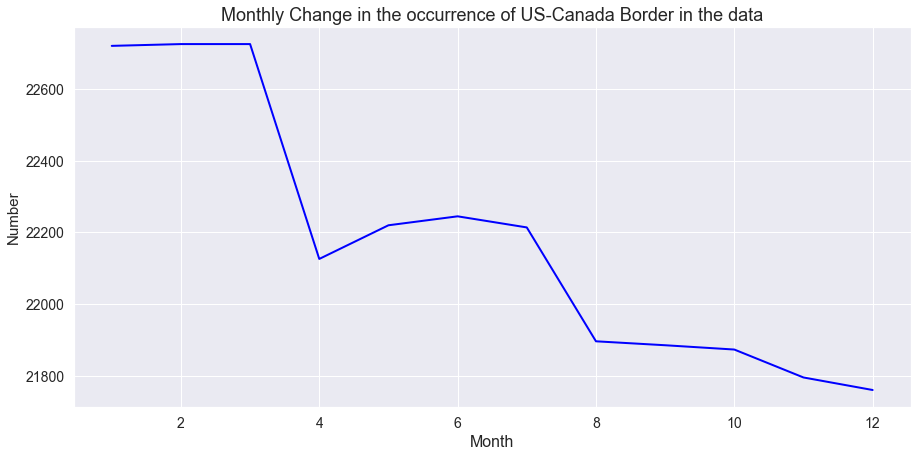

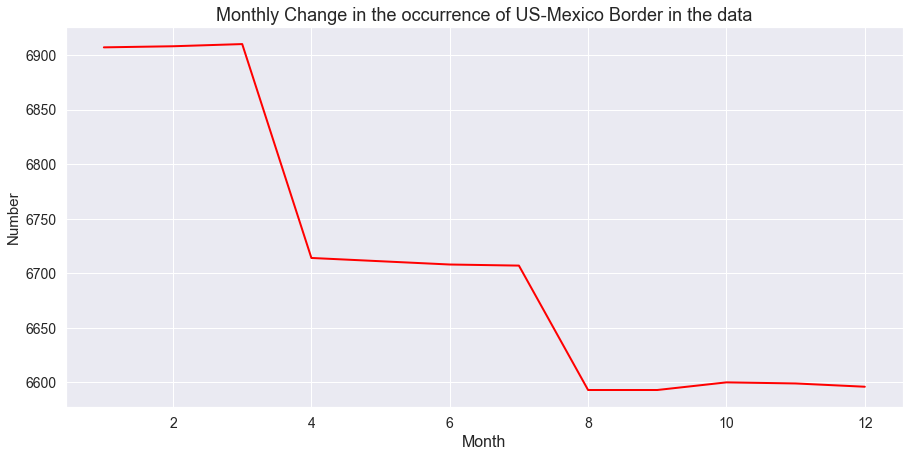

In [34]:
plt.figure(figsize=(15,7))

sns.lineplot(data =month_border[month_border.Border== 'US-Canada Border'], x='Month',y ='State', color= 'b',lw=2)
plt.ylabel('Number of people')
plt.title('Monthly Change in the occurrence of US-Canada Border in the data', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number',fontsize=15)
plt.xlabel('Month', fontsize=16)


plt.show()
plt.figure(figsize=(15,7))

sns.lineplot(data =month_border[month_border.Border== 'US-Mexico Border'], x='Month',y ='State', color='red',lw=2)
plt.ylabel('Number of people')
plt.title('Monthly Change in the occurrence of US-Mexico Border in the data', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number',fontsize=15)
plt.xlabel('Month', fontsize=16)

plt.show()

From the graph above there is a big downwards slope towards the end of month in both Border

I am going to use Seaborn  FacetGrid to visualise it Year by Year to see how each Year affect the graph

In [35]:
month_year =df2.groupby(['Border','Year','Month']).count().sort_values(by=['Border','Year','Month']).reset_index()
month_year

,Border,Year,Month,Port Name,State,Port Code,Date,Measure,Value,Location,latitude,longitude
0,US-Canada Border,1996,1,936,936,936,936,936,936,936,936,936
1,US-Canada Border,1996,2,936,936,936,936,936,936,936,936,936
2,US-Canada Border,1996,3,936,936,936,936,936,936,936,936,936
3,US-Canada Border,1996,4,936,936,936,936,936,936,936,936,936
4,US-Canada Border,1996,5,936,936,936,936,936,936,936,936,936
...,...,...,...,...,...,...,...,...,...,...,...,...
553,US-Mexico Border,2018,11,194,194,194,194,194,194,194,194,194
554,US-Mexico Border,2018,12,191,191,191,191,191,191,191,191,191
555,US-Mexico Border,2019,1,192,192,192,192,192,192,192,192,192
556,US-Mexico Border,2019,2,193,193,193,193,193,193,193,193,193


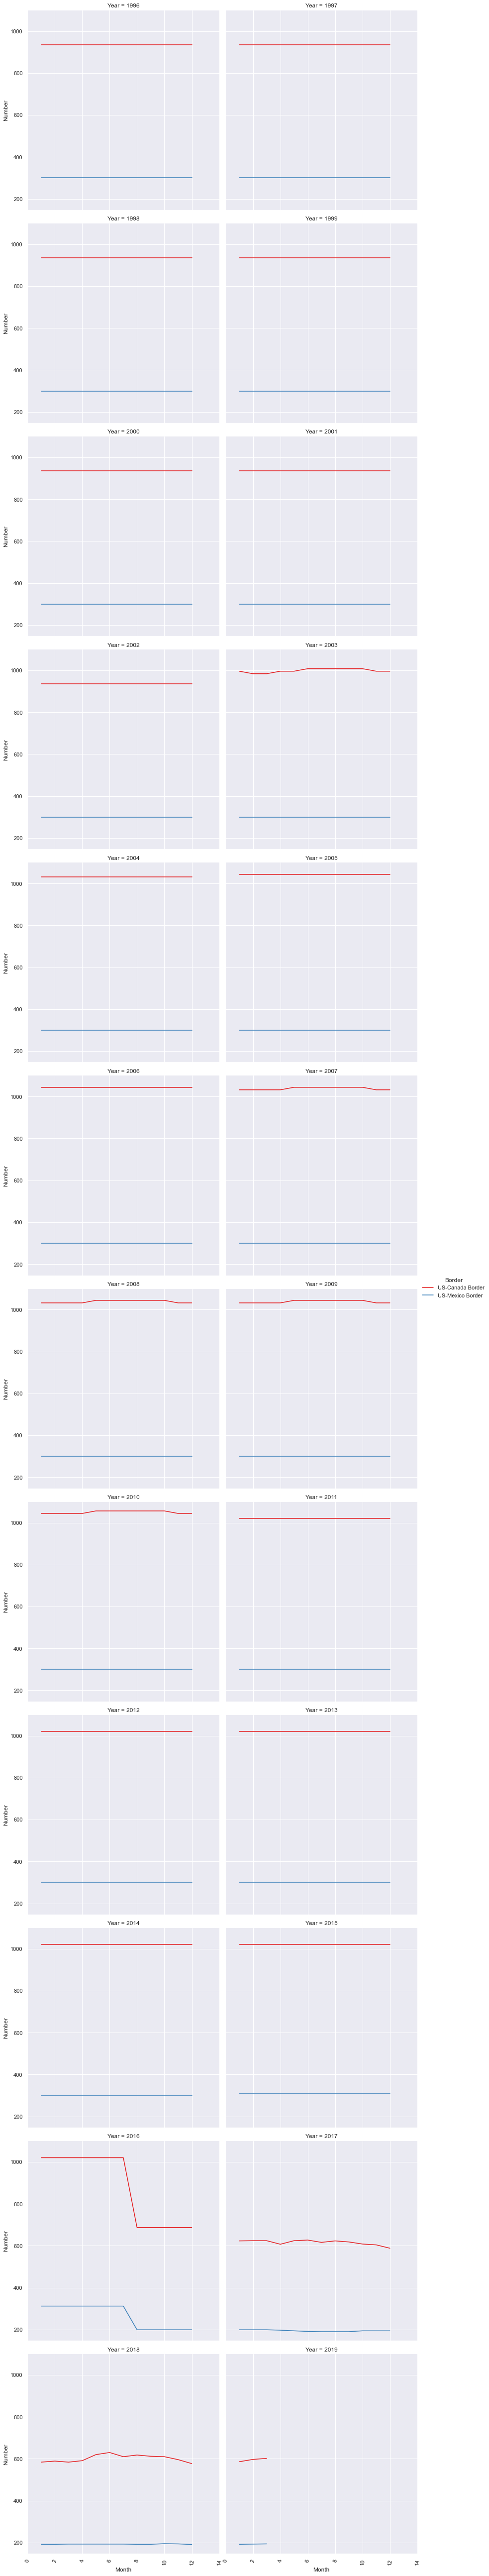

In [36]:
# plt.subplots_adjust(top=0.5,)

g4 = sns.FacetGrid(month_year, col='Year',hue='Border', col_wrap=2, height=6)
# g4.fig.suptitle('kkk',)
g4 = (g4.map(plt.plot,'Month', 'State').add_legend())
g4.set_ylabels('Number')
# plt.subplots_adjust(top=0.5)
# g.set_title(('Monthly gross by Year'))
g4.set_xticklabels(rotation=80)
plt.show()

From the graphs above, 2019 has no entries for April to December. Also it can be shown that the big downward slope is actually only in 2016. 

What is the distribution of Value?

Text(0.5, 1.0, 'Value distribution')

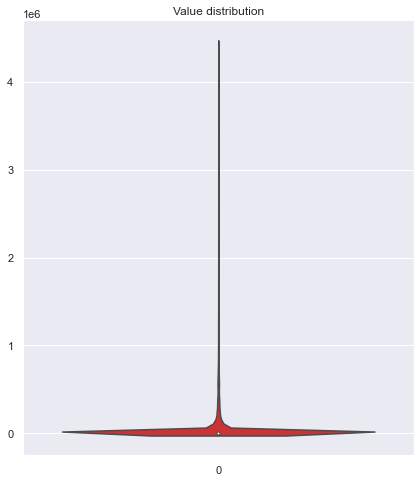

In [37]:
plt.figure(figsize=(7,8))
sns.violinplot(data = df2['Value'])
plt.title('Value distribution')

We can also see that the Value column has a very long tail to right.

____

In [38]:
value_sum =df2.groupby(['Border']).sum().sort_values(by=['Port Code']).reset_index()
value_sum

,Border,Port Code,Value,Year,Month
0,US-Mexico Border,196858368,7085632048,161633286,518883
1,US-Canada Border,654546216,2687962794,534197883,1716651


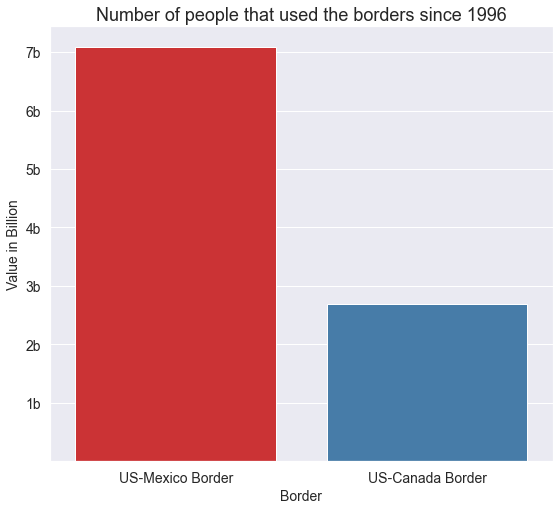

In [39]:
plt.figure(figsize=(9,8))
ax = plt.subplot()
sns.barplot(data= value_sum, x= 'Border', y='Value',  )
plt.title('Number of people that used the borders since 1996',fontsize=18)
plt.ylabel('Value in Billion',fontsize=14)
plt.xlabel('Border',fontsize=14)

ax.set_yticks([1000000000,2000000000,3000000000,4000000000,5000000000,6000000000,7000000000])
ax.set_yticklabels(['1b','2b','3b','4b','5b','6b','7b',])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [40]:
valueY_sum =df2.groupby(['Border','Year']).mean().sort_values(by=['Border','Year'],ascending=False).reset_index()
valueY_sum 

,Border,Year,Port Code,Value,Month
0,US-Mexico Border,2019,2437.134715,117369.034542,2.003454
1,US-Mexico Border,2018,2438.421963,122673.236922,6.502810
2,US-Mexico Border,2017,2438.537967,119563.707422,6.460746
3,US-Mexico Border,2016,2442.505505,86043.537276,5.877949
4,US-Mexico Border,2015,2443.269231,71491.302350,6.500000
5,US-Mexico Border,2014,2444.600000,70762.854722,6.500000
6,US-Mexico Border,2013,2444.600000,67772.840833,6.500000
7,US-Mexico Border,2012,2444.600000,64722.128889,6.500000
8,US-Mexico Border,2011,2444.600000,62650.302500,6.500000
9,US-Mexico Border,2010,2444.600000,67438.026111,6.500000


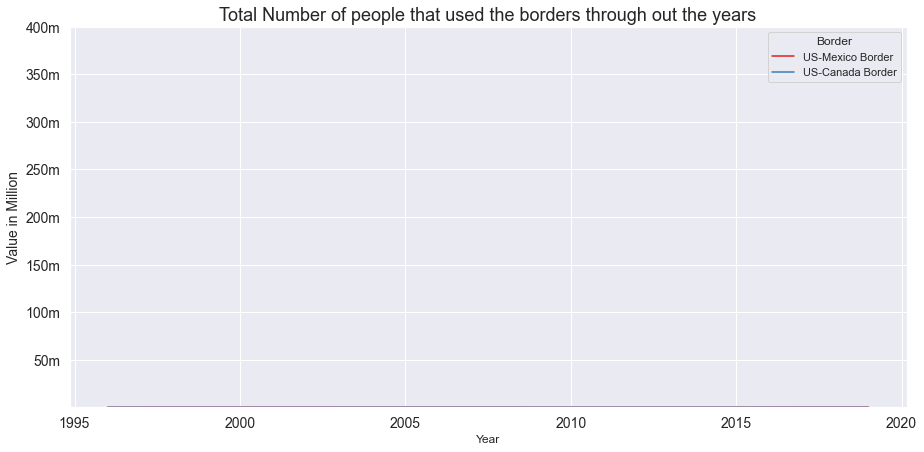

In [41]:
plt.figure(figsize=(15,7))
ax = plt.subplot()
sns.lineplot(x='Year',y='Value',hue="Border",data=valueY_sum)

plt.title('Total Number of people that used the borders through out the years',fontsize=18)
plt.ylabel('Value in Million',fontsize=14)
ax.set_yticks([50000000,100000000,150000000,200000000,250000000,300000000,350000000,400000000])
ax.set_yticklabels(['50m','100m','150m','200m','250m','300m','350m','400m'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

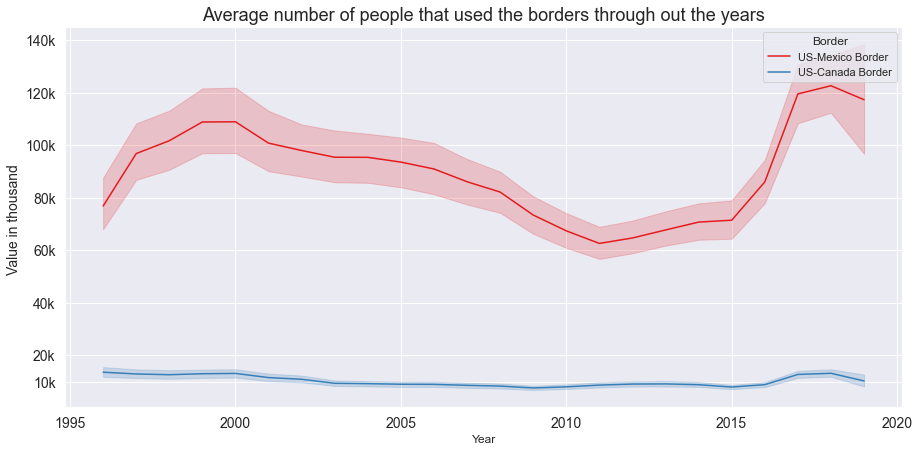

In [42]:
plt.figure(figsize=(15,7))
ax = plt.subplot()
sns.lineplot(x='Year',y='Value',hue="Border",data=df2,)

plt.title('Average number of people that used the borders through out the years',fontsize=18)
plt.ylabel('Value in thousand ',fontsize=14)
ax.set_yticks([10000,20000,40000,60000,80000,100000,120000,140000])
ax.set_yticklabels(['10k','20k','40k','60k','80k','100k','120k','140k'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

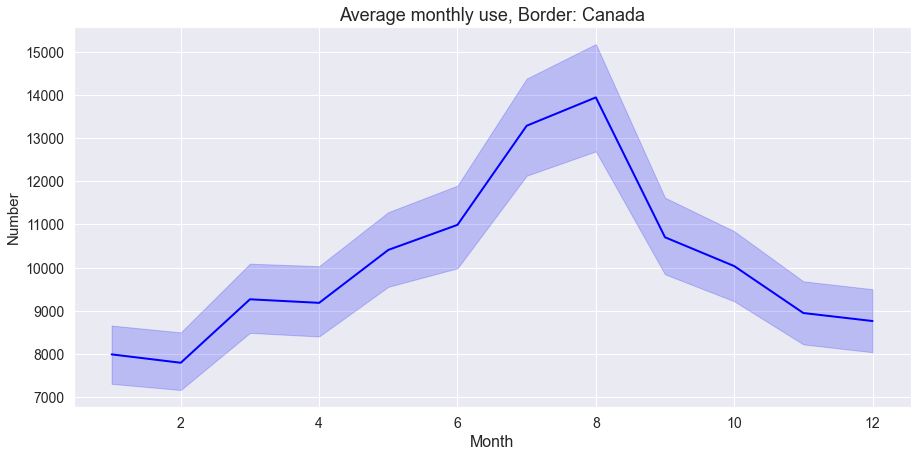

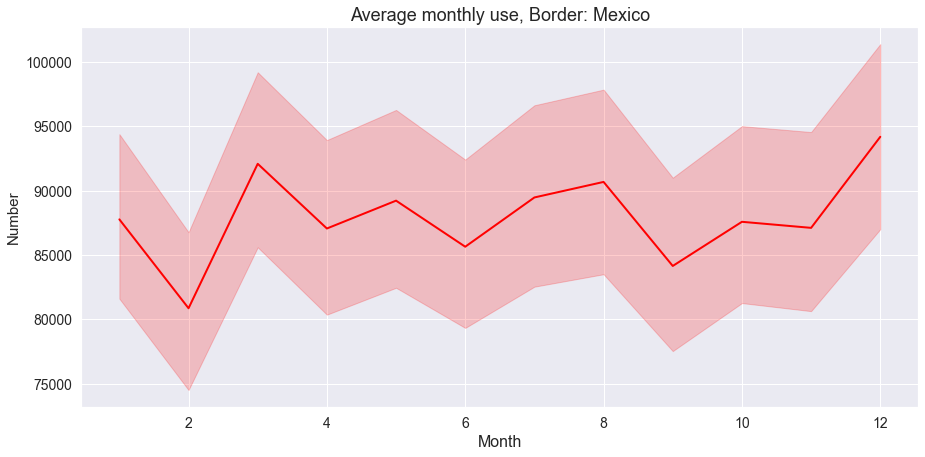

In [43]:
plt.figure(figsize=(15,7))

sns.lineplot(data =df2[df2.Border== 'US-Canada Border'], x='Month',y ='Value', color= 'b',lw=2)
plt.ylabel('Number of people')
plt.title('Average monthly use, Border: Canada', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number',fontsize=15)
plt.xlabel('Month', fontsize=16)


plt.show()
plt.figure(figsize=(15,7))

sns.lineplot(data =df2[df2.Border== 'US-Mexico Border'], x='Month',y ='Value', color='red',lw=2)
plt.ylabel('Number of people')
plt.title('Average monthly use, Border: Mexico', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number',fontsize=15)
plt.xlabel('Month', fontsize=16)

plt.show()

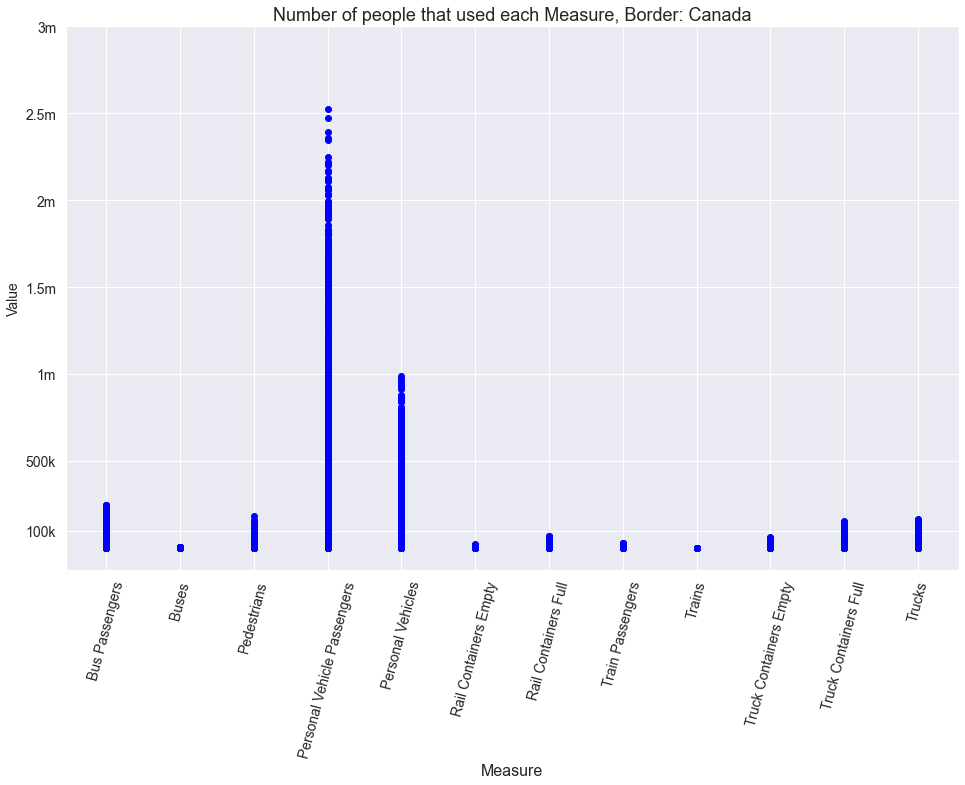

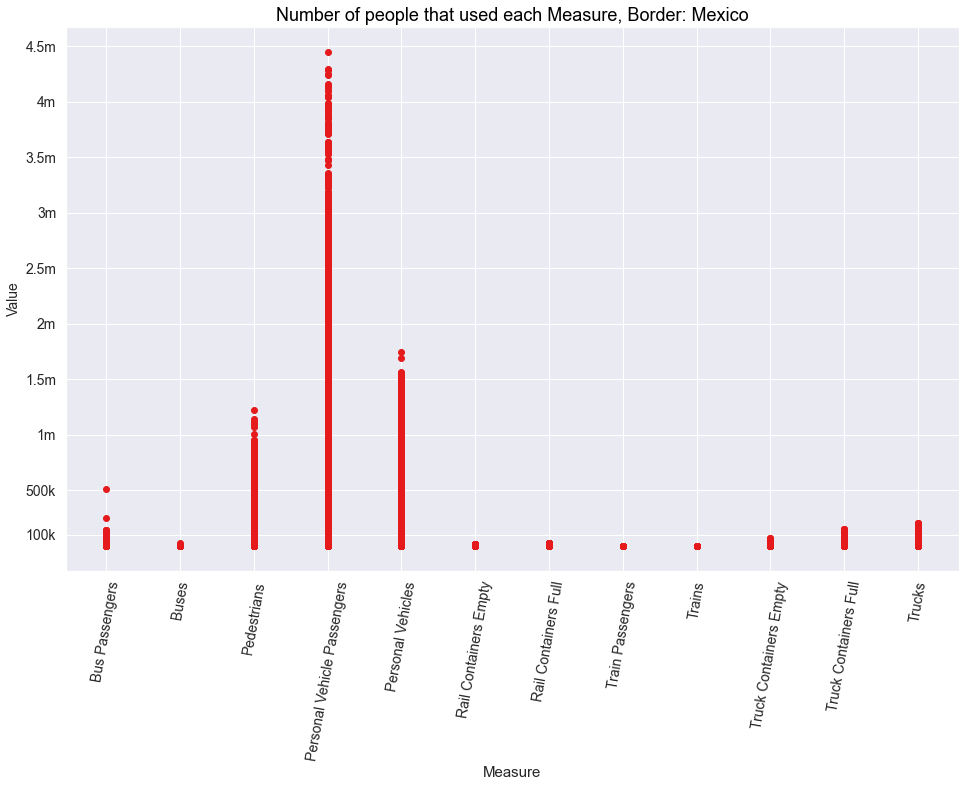

In [44]:
f =plt.figure(figsize=(16,10))

ax = plt.subplot()
plt.scatter(x='Measure',y='Value', data=((df2[df2['Border']=='US-Canada Border']).sort_values(by='Measure')),color = 'b')
plt.title('Number of people that used each Measure, Border: Canada',fontsize=18,)
plt.ylabel('Value',fontsize=14)
ax.set_yticks([100000,500000,1000000,1500000,2000000,2500000,3000000])
ax.set_yticklabels(['100k','500k','1m','1.5m','2m','2.5m','3m'])
plt.xticks(rotation=75,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Measure',fontsize=16)


plt.show()

plt.figure(figsize=(16,10))
ax = plt.subplot()
plt.scatter(x='Measure', y ='Value', data=(df2[df2['Border']=='US-Mexico Border'].sort_values(by='Measure')))
plt.title('Number of people that used each Measure, Border: Mexico',fontsize=18,color='black')
ax.set_yticks([100000,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000])
ax.set_yticklabels(['100k','500k','1m','1.5m','2m','2.5m','3m','3.5m','4m','4.5m'])
plt.xticks(rotation=80,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Measure',fontsize=15)

plt.ylabel('Value',fontsize=14)

plt.show()

In [45]:
valuem_sum =df2.groupby(['Border','Measure']).sum().sort_values(by=['Border','Measure']).reset_index()
valuem_sum

,Border,Measure,Port Code,Value,Year,Month
0,US-Canada Border,Bus Passengers,54424348,74327495,44330235,142782
1,US-Canada Border,Buses,54431846,3093613,44334268,142775
2,US-Canada Border,Pedestrians,53050586,12968574,43468851,139870
3,US-Canada Border,Personal Vehicle Passengers,57226246,1538658810,46573780,149787
4,US-Canada Border,Personal Vehicles,57322246,736044372,46620194,149948
5,US-Canada Border,Rail Containers Empty,52126475,12350707,42668090,136883
6,US-Canada Border,Rail Containers Full,52126475,30461135,42668090,136883
7,US-Canada Border,Train Passengers,52226199,5909597,42728590,137102
8,US-Canada Border,Trains,52213640,700993,42716490,137061
9,US-Canada Border,Truck Containers Empty,56448811,24647416,46023064,147786


C:\Users\vans\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


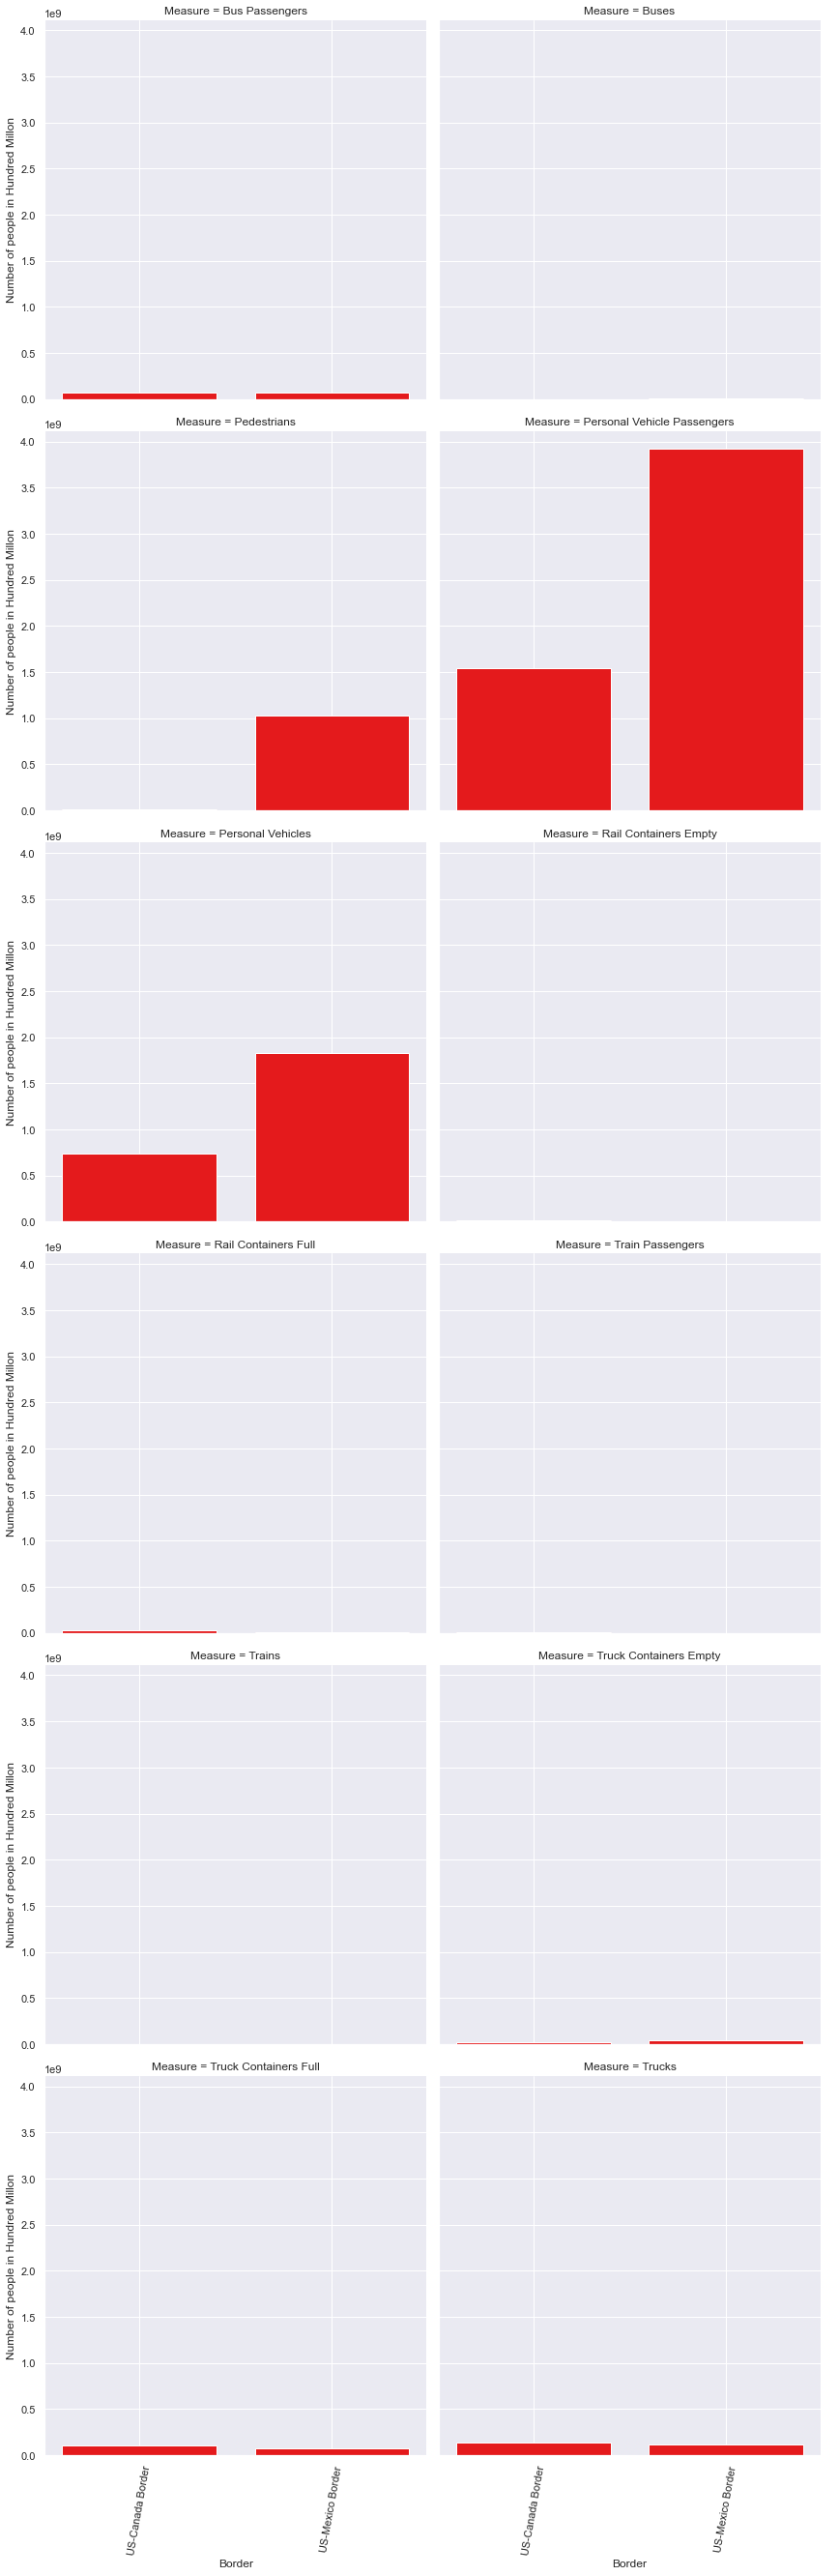

In [46]:
g6 = sns.FacetGrid(valuem_sum, col='Measure', col_wrap=2, size=6)
g6 = (g6.map(plt.bar,'Border', 'Value').add_legend())
g6.set_ylabels('Number of people in Hundred Millon')
g6.set_xticklabels(rotation=80)
plt.show()

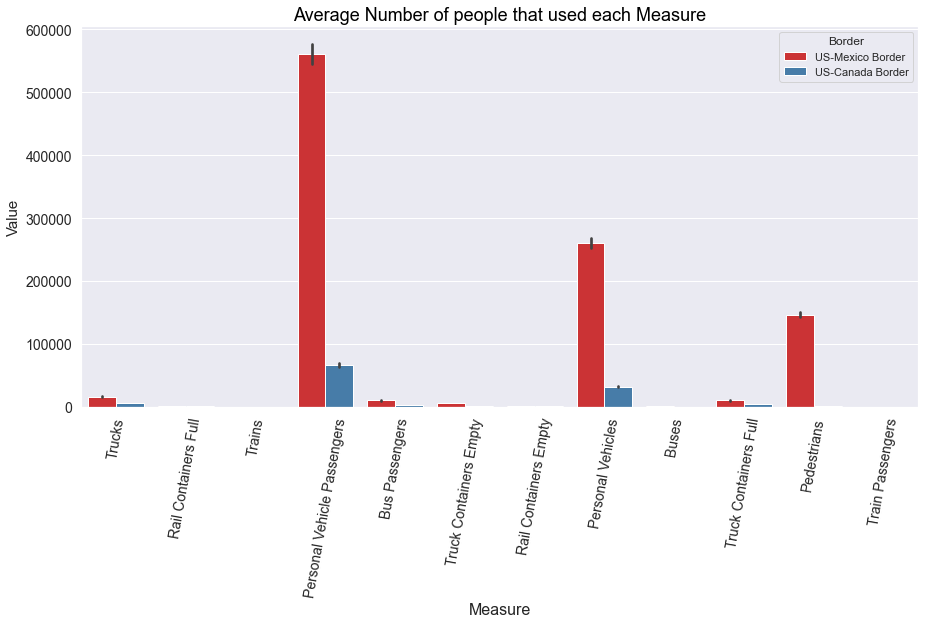

In [47]:
plt.figure(figsize=(15,7))
sns.barplot(data = df2, x= 'Measure',y= 'Value',hue ='Border')
plt.title('Average Number of people that used each Measure',fontsize=18,color='black')
plt.xticks(rotation =80)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Value',fontsize=15)
plt.xlabel('Measure', fontsize=16)
plt.show()

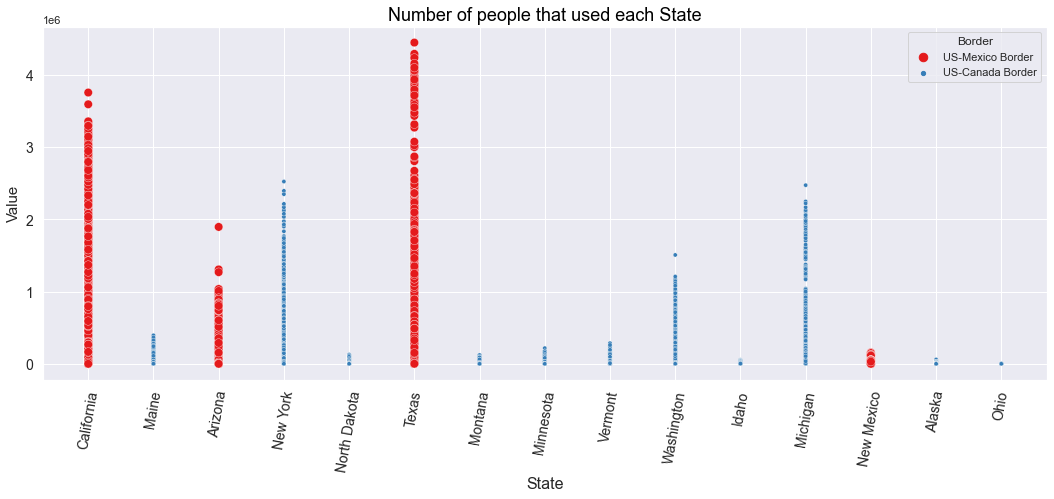

In [48]:
plt.figure(figsize=(18, 6.5))
sns.scatterplot(x="State", y="Value",hue="Border", size="Border",data=df2)
plt.title('Number of people that used each State',fontsize=18,color='black')
plt.xticks(rotation =80,fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Value',fontsize=15)
plt.xlabel('State', fontsize=16)
plt.show()

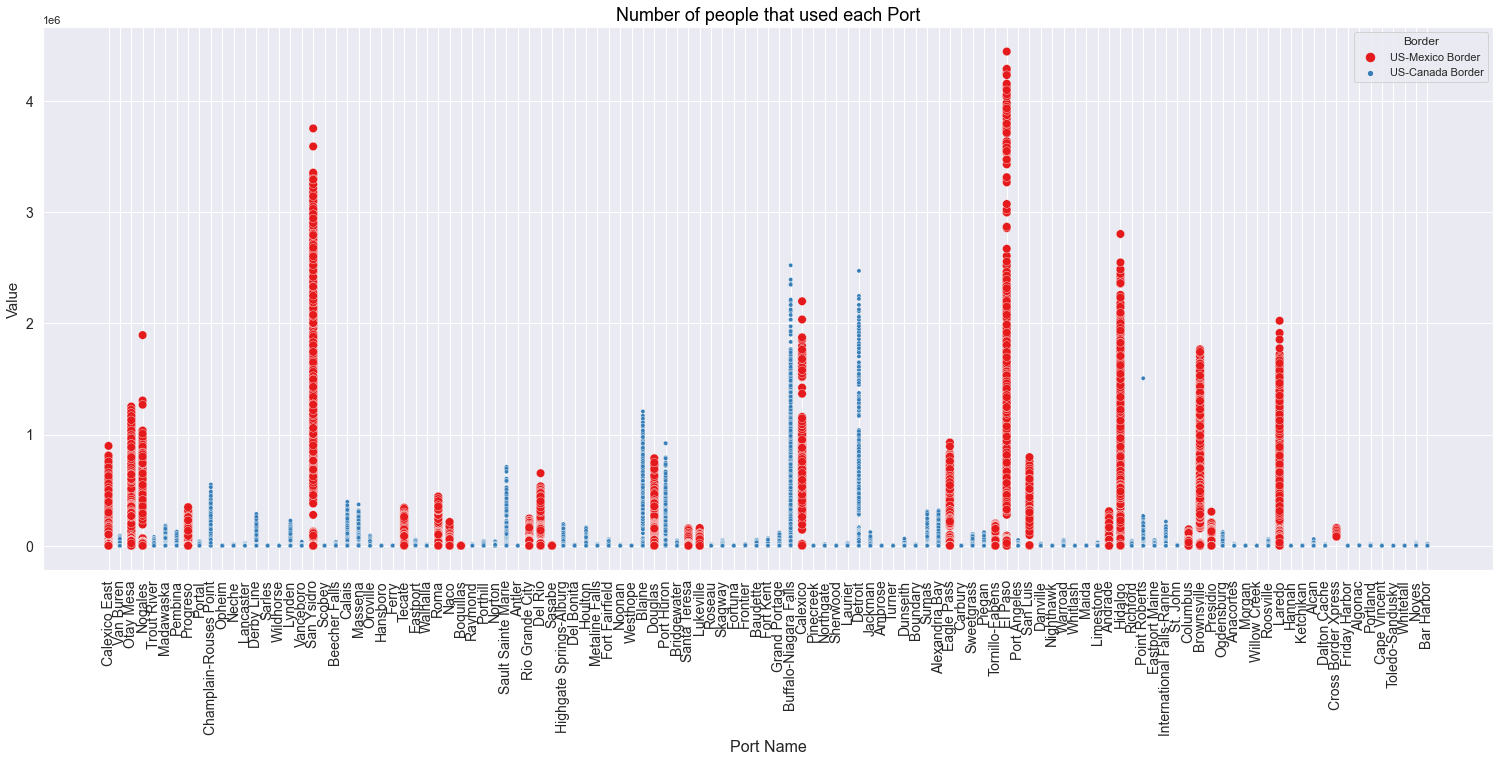

In [49]:
plt.figure(figsize=(26, 10))
sns.scatterplot(x="Port Name", y="Value",
                hue="Border", size="Border",data=df2)
plt.title('Number of people that used each Port',fontsize=18,color='black')
plt.xticks(rotation =90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Value',fontsize=15)
plt.xlabel('Port Name', fontsize=16)
plt.show()